# QuickSort vs QuickSort+
Работу выполнил студент Голев. А.С. 2022</br>
 @author: goliksim

#### Cуть QuickSort+

В худшем случае, когда массив обратно отсортирован, а опорным элемент- первый, глубина рекурсии в обычном QuickSort будет не **log(n)**, а **n**. </br>
В таком случае необходимо как-то уменьшить глубину. Способ, используемый мною, состоит в том чтобы измерить длину полученных отрезков и в рекурсивном подсчете только малого отрезка, а больший отрезок сортируется итерационной реализацией того же quicksort.

#### Задание
1. Сравнить Quicksort vs Quicksort+ . Обратно отсортированный массив. Зависимость операций от N (подбирать аппроксимацию)
2. Зависимость от степени отсортированности. Зависимость времени сортировки от номера колонки
3. Считать глубину рекурсии
4. итеративный способ

In [21]:
import numpy as np
from collections import Counter
from tqdm import tqdm
from matplotlib import pyplot as plt
import sys

sys.setrecursionlimit(50000)

### Реализация Quicksort

In [26]:
def quicksort(array, L=0, R=None, max_depth=0):
    if R==None:
       R = len(array)-1
    if (L >= R):
        return 0,0, max_depth
    pivot = array[L]
    #pivot = array[(L+R)//2]
    comp, chng = 0, 0
    i, j = L, R+1
    while (True): 
        while(True):
            i+=1
            comp+=1 
            if((i > R) or (array[i] >= pivot)) : 
                break
        while(True):
            j-=1 
            comp+=1
            if(array[j] <= pivot) : break
        if (i > j):
            break
        array[i], array[j] = array[j], array[i]
        chng+=1
    array[L], array[j] = array[j], array[L]
    chng+=1

    f = quicksort(array,L, j-1, max_depth+1)
    comp+=f[0]
    chng+=f[1]
    e = quicksort(array,j+1, R, max_depth+1)
    comp+=e[0]
    chng+=e[1]
    max_depth = max([f[2],e[2]])

    return comp, chng, max_depth

In [76]:
def quicksortIter(array,L=0,R=None, maxdepth=0):
    if R==None:
        R = len(array)-1
    stack = [L,R]
    
    comp,chng = 0, 0
    while len(stack) > 0:
        right_idx_of_subset = stack.pop() #читаем последний элемент и удаляем
        left_idx_of_subset = stack.pop() #читаем последний элемент и удаляем
        
        left_idx = left_idx_of_subset + 1   #1
        pivot_idx = left_idx_of_subset      #0
        right_idx = right_idx_of_subset     #len(array) - 1
        
        pivot = array[pivot_idx]

        comp += 1
        #ищем индексы, на которых элементы меньше/больше пивота 
        if left_idx > right_idx:
            continue
        while left_idx < right_idx:
            comp += 2
            while (left_idx <= right_idx) and (array[left_idx] <= pivot):
                left_idx += 1
            comp += 2
            while (left_idx <= right_idx) and (array[right_idx] >= pivot):
                right_idx -= 1
            comp += 1    
            if right_idx >= left_idx:
                chng += 1
                array[left_idx], array[right_idx] = array[right_idx], array[left_idx]
        #меняем местами пивот и right_idx
        comp += 1
        if pivot_idx <= right_idx:
            if array[pivot_idx] > array[right_idx]:
                chng += 1
                array[pivot_idx], array[right_idx] = array[right_idx], array[pivot_idx]
        #рекурсия левой части
        comp += 1
        if left_idx_of_subset < right_idx:
            stack.append(left_idx_of_subset)
            stack.append(right_idx - 1)
        #рекурсия правой части
        comp += 1
        if right_idx_of_subset > right_idx:
            stack.append(right_idx + 1)
            stack.append(right_idx_of_subset)
    return comp, chng, maxdepth

In [28]:
def quickshort(array, L=0, R=None, max_depth=0):
    if R==None:
       R = len(array)-1
    if (L >= R):
        return 0,0, max_depth
    pivot = array[L]
    #pivot = array[(L+R)//2]
    comp, chng = 0, 0
    i, j = L, R+1
    while (True): 
        while(True):
            i+=1
            comp+=1 
            if((i > R) or (array[i] >= pivot)) : 
                break
        while(True):
            j-=1 
            comp+=1
            if(array[j] <= pivot) : break
        if (i > j):
            break
        array[i], array[j] = array[j], array[i]
        chng+=1
    array[L], array[j] = array[j], array[L]
    chng+=1

    if ((j-1 - L) <= (R - j-1)):
        f = quickshort(array,L, j-1,max_depth+1)
        comp+=f[0]
        chng+=f[1]
        e = quicksortIter(array,j+1, R,max_depth)
        comp+=e[0]
        chng+=e[1]
        max_depth = max([f[2],e[2]])
    else:
        f = quickshort(array,j+1, R,max_depth+1)
        comp+=f[0]
        chng+=f[1]
        e = quicksortIter(array,L, j-1,max_depth+1)
        comp+=e[0]
        chng+=e[1]
        max_depth = max([f[2],e[2]])

    return comp, chng, max_depth

### Случайный массив

In [29]:
x = np.array([int(2000*x-1000) for x in np.random.rand(10)])
quickshort(x,0,len(x)-1)
x

array([-909, -785, -658, -657, -413, -333, -247,  167,  467,  748])

In [123]:
num_iter_base = []
num_iter_pro = []
x_axis=[]
for n in tqdm(range(10,2000,50)):
   array = [int(200*n*x - 100*n) for x in np.random.rand(n)]
   #num_iter_base.append(quicksort(array,0,len(array)-1))
   num_iter_pro.append(quickshort(array.copy(),0,len(array)-1))
   num_iter_base.append(quicksort(array.copy(),0,len(array)-1))
   #num_iter_pro.append(quickshort(array,0,len(array)-1))
   x_axis.append(n)    

100%|██████████| 40/40 [00:00<00:00, 179.41it/s]


In [119]:
def show_graf(text, index):
    fig, axs = plt.subplots(1,2, figsize=(10,5))
    axs[0].plot(x_axis, [a[index] for a in num_iter_base],color='tab:blue')
    axs[0].set_title(text)
    axs[0].set_ylabel('Base',color = 'tab:blue')
    axs[0].set_xlabel('N')

    ax2 = axs[0].twinx()  

    ax2.plot(x_axis, [a[index] for a in num_iter_pro],color='tab:red')
    ax2.set_ylabel('Improved',color = 'tab:red')

    axs[1].plot(x_axis, [a[index] for a in num_iter_base],color='tab:blue')
    axs[1].set_title(text)
    axs[1].set_ylabel('Base',color = 'tab:blue')
    axs[1].set_xlabel('N')

    axs[1].plot(x_axis, [a[index] for a in num_iter_pro],color='tab:red')
    axs[1].set_ylabel('Improved',color = 'tab:red')
    axs[1].legend(['Base model','Improved'])
    fig.autofmt_xdate()
    fig.tight_layout()

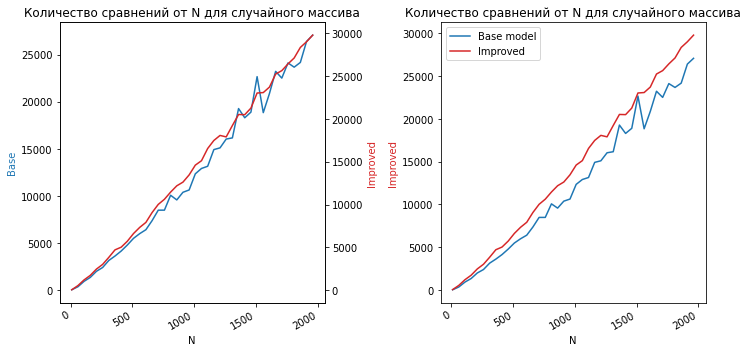

In [124]:
show_graf('Количество сравнений от N для случайного массива',0)

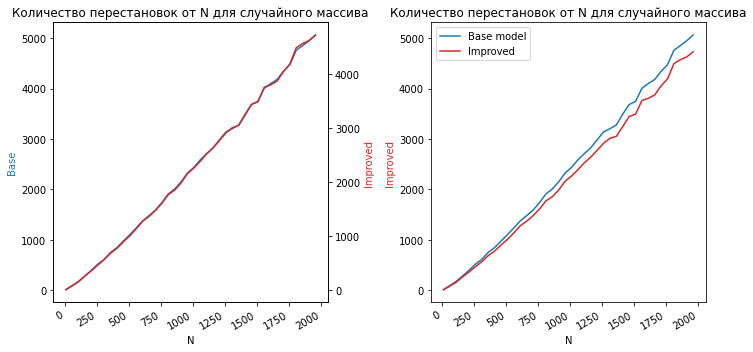

In [125]:
show_graf('Количество перестановок от N для случайного массива',1)

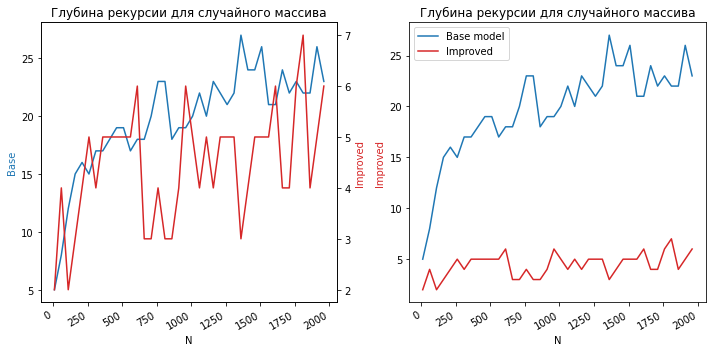

In [126]:
show_graf('Глубина рекурсии для случайного массива',2)

### Обратно отсортированный массив

In [129]:
num_iter_base_bad = []
num_iter_pro_bad = []
x_axis=[]
for n in tqdm(range(10,1000,50)):
   array = [int(200*n*x - 100*n) for x in np.random.rand(n)]
   array.sort()
   a = np.array(array[::-1])
   f = quicksort(a,0,len(array)-1)
   if ((a==array).all()):
       num_iter_base_bad.append(f)
   x_axis.append(n)
   
for n in tqdm(range(10,1000,50)):
   array = [int(200*n*x - 100*n) for x in np.random.rand(n)]
   array.sort()
   b = np.array(array[::-1])
   e = quickshort(b,0,len(array)-1)
   if ((b==array).all()):
       num_iter_pro_bad.append(e)
   #x_axis.append(n)
   #x_axis.append(n)
  

100%|██████████| 20/20 [00:00<00:00, 45.47it/s] 


In [127]:
def show_graf_bad(text, index):
    fig, axs = plt.subplots(1,2, figsize=(10,5))
    axs[0].plot(x_axis, [a[index] for a in num_iter_base_bad],color='tab:blue')
    axs[0].set_title(text)
    axs[0].set_ylabel('Base',color = 'tab:blue')
    axs[0].set_xlabel('N')

    ax2 = axs[0].twinx()  

    ax2.plot(x_axis, [a[index] for a in num_iter_pro_bad],color='tab:red')
    ax2.set_ylabel('Improved',color = 'tab:red')

    axs[1].plot(x_axis, [a[index] for a in num_iter_base_bad],color='tab:blue')
    axs[1].set_title(text)
    axs[1].set_ylabel('Base',color = 'tab:blue')
    axs[1].set_xlabel('N')

    axs[1].plot(x_axis, [a[index] for a in num_iter_pro_bad],color='tab:red')
    axs[1].set_ylabel('Improved',color = 'tab:red')
    axs[1].legend(['Base model','Improved'])
    fig.autofmt_xdate()
    fig.tight_layout()

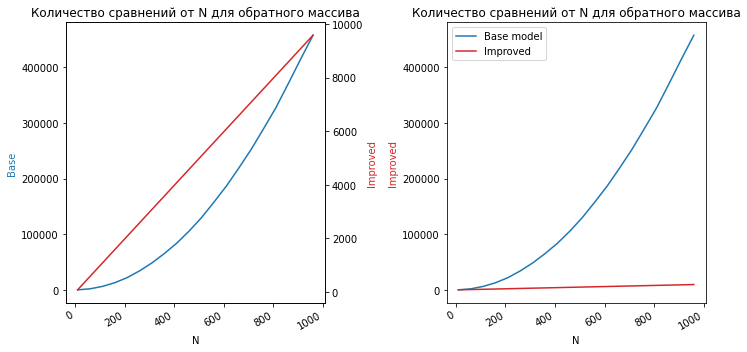

In [130]:
show_graf_bad('Количество сравнений от N для обратного массива',0)

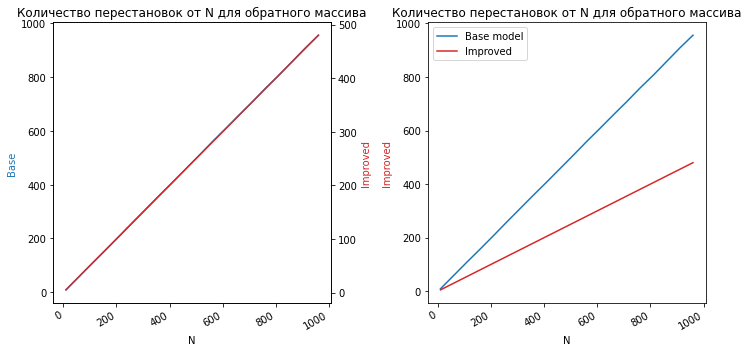

In [131]:
show_graf_bad('Количество перестановок от N для обратного массива',1)

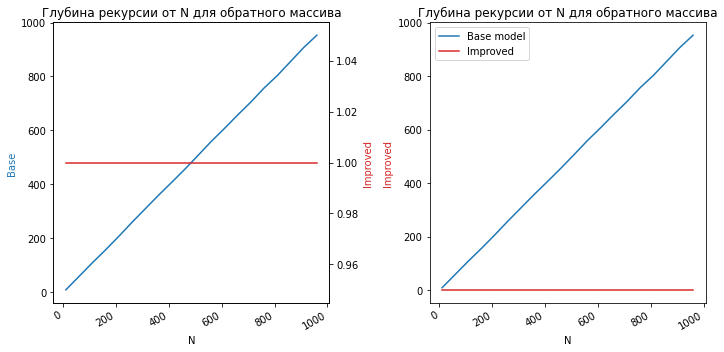

In [132]:
show_graf_bad('Глубина рекурсии от N для обратного массива',2)

### Создадим массив N=10000 тип int

In [97]:
main_array =  np.array([int(2000000*x) for x in np.random.rand(1000)])

### Создаем матрицу неупорядоченности

In [95]:
def bubblesort(i, a, reversed=False):
    N = len(a)
    #prov = 0
    for j in range(N-i-1):
        if not reversed:
            if (a[j] > a[j+1] ):
                a[j], a[j+1] = a[j+1], a[j]
                #prov+=1
        else:
            if (a[j] <= a[j+1] ):
                a[j], a[j+1] = a[j+1], a[j]
                #prov+=1
    #if (prov==0):
    #    raise
    return a
	

In [96]:
def get_matrix(main_array):
    sorted_matrix = []
    direct_sort = []
    reversed_sort = []
    direct_sort.append([*main_array.copy()])
    reversed_sort.append([*main_array.copy()])

    N = len(direct_sort[0])
    for i in tqdm(range(N-1)):
        try:
            direct_sort.append([*bubblesort(i, direct_sort[-1].copy())])
        except:
            pass
        try:
            reversed_sort.append([*bubblesort(i, reversed_sort[-1].copy(),True)])
        except:
            pass
    sorted_matrix = reversed_sort[::-1] + direct_sort[1::1]
    return sorted_matrix

In [98]:
import copy
sorted_matrix = get_matrix(main_array)

100%|██████████| 999/999 [00:00<00:00, 5643.65it/s]


In [99]:
#print(sorted_matrix[0][0:3])
num_iter_base_matrix = []
for array,i in zip(sorted_matrix[::5],tqdm(range(len(sorted_matrix[::5])))):
    num_iter_base_matrix.append(quicksort(array.copy(),0,len(array)-1))

   

100%|█████████▉| 399/400 [00:05<00:00, 67.37it/s] 


In [ ]:
num_iter_base_matrix[0:10]

In [100]:
#print(sorted_matrix[0][0:3])
num_iter_pro_matrix = []
for array,i in zip(sorted_matrix[::5],tqdm(range(len(sorted_matrix[::5])))):
    num_iter_pro_matrix.append(quickshort(array.copy(),0,len(array)-1))

100%|█████████▉| 399/400 [00:05<00:00, 76.20it/s] 


In [ ]:
num_iter_pro_matrix[0:10]

In [134]:
def show_graf_matrix(text, index):
    fig, axs = plt.subplots(1,2, figsize=(15,5))
    axs[0].plot(np.linspace(0,len(num_iter_base_matrix),len(num_iter_base_matrix)), [a[index] for a in num_iter_base_matrix],color='tab:blue')
    axs[0].set_title(text)
    axs[0].set_ylabel('Base',color = 'tab:blue')
    axs[0].set_xlabel('column')

    ax2 = axs[0].twinx()  

    ax2.plot(np.linspace(0,len(num_iter_base_matrix),len(num_iter_base_matrix)), [a[index] for a in num_iter_pro_matrix],color='tab:red')
    ax2.set_ylabel('Improved',color = 'tab:red')

    axs[1].plot(np.linspace(0,len(num_iter_base_matrix),len(num_iter_base_matrix)), [a[index] for a in num_iter_base_matrix],color='tab:blue')
    axs[1].set_title(text)
    axs[1].set_ylabel('Base',color = 'tab:blue')
    axs[1].set_xlabel('column')

    axs[1].plot(np.linspace(0,len(num_iter_base_matrix),len(num_iter_base_matrix)), [a[index] for a in num_iter_pro_matrix],color='tab:red')
    axs[1].set_ylabel('Improved',color = 'tab:red')
    axs[1].legend(['Base model','Improved'])

    fig.autofmt_xdate()
    fig.tight_layout()

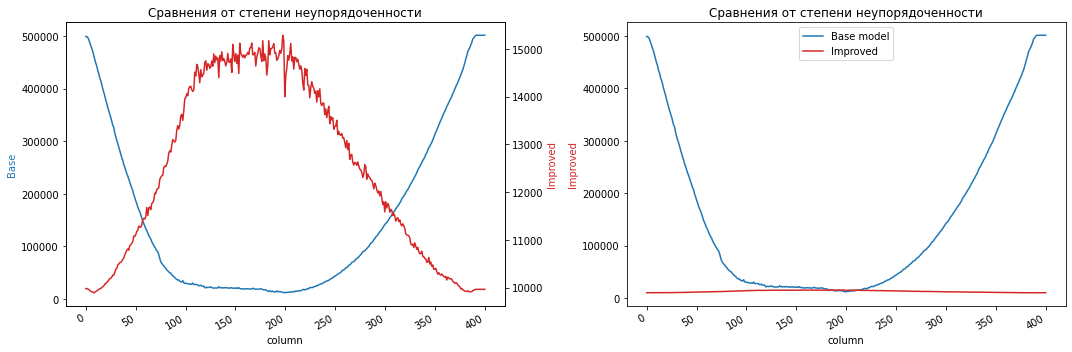

In [135]:
show_graf_matrix('Сравнения от степени неупорядоченности',0)

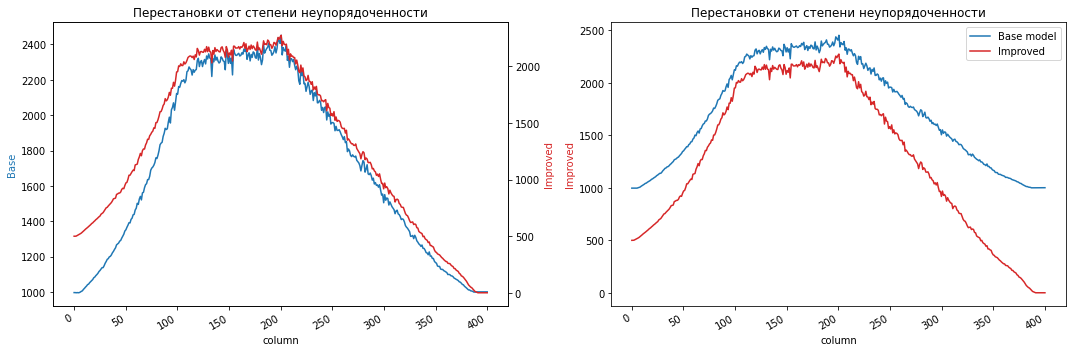

In [136]:
show_graf_matrix('Перестановки от степени неупорядоченности',1)

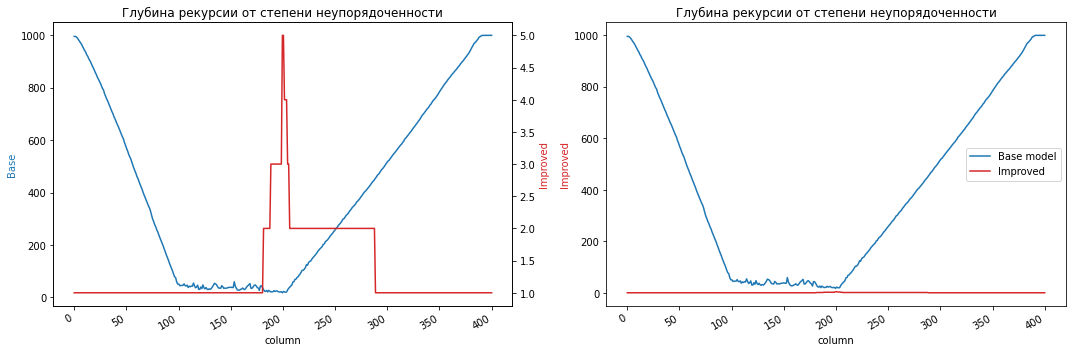

In [137]:
show_graf_matrix('Глубина рекурсии от степени неупорядоченности',2)

Она теперь не заваливается на сортировке огромных значений

In [115]:
array = [int(200000*n*x - 100000*n) for x in np.random.rand(1000000)]
#num_iter_base.append(quicksort(array,0,len(array)-1))
b = array.copy()
b.sort()
b = np.array(b)
f = quickshort(array,0,len(array)-1)

if ((b==array).all()):
    print(f'Sorting Right!\nmax depth - {f[2]}\n{array[0:10]}')   

Sorting Right!
max depth - 10
[-95999819, -95999580, -95999566, -95999501, -95999416, -95999392, -95999365, -95999267, -95999120, -95999101]
